In [1]:
# Import pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the classifiers we will be using
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import train/test split function
from sklearn.model_selection import train_test_split

# Import cross validation scorer
from sklearn.model_selection import cross_val_score

# Import ROC AUC scoring function
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report

from scipy.stats import randint

In [13]:
%matplotlib notebook
plt.style.available

['dark_background',
 'bmh',
 'grayscale',
 'seaborn-darkgrid',
 'seaborn-poster',
 'seaborn-ticks',
 'seaborn-deep',
 'Solarize_Light2',
 '_classic_test',
 'seaborn-white',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-muted',
 'fast',
 'seaborn-notebook',
 'ggplot',
 'seaborn-pastel',
 'classic',
 'seaborn-talk',
 'seaborn-dark',
 'seaborn-paper',
 'seaborn-dark-palette',
 'seaborn-whitegrid',
 'fivethirtyeight',
 'seaborn']

In [3]:
plt.style.use('seaborn')

## Iris.csv

In [4]:
iris =  pd.read_csv('data/iris.csv')
iris.shape

(150, 5)

In [5]:
iris.head(2)
iris.columns

Index(['sepallength', ' sepalwidth', ' petallength', ' petalwidth', ' class '], dtype='object')

In [6]:
features = iris.drop([' class '], axis=1)
target = iris[' class ']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

In [8]:
parameter_space = [{"n_neighbors":[1,3,5,7,9,11,13,15,17,19,21]}]
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameter_space, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [9]:
grid_search.best_params_

{'n_neighbors': 5}

In [10]:
x = grid_search.cv_results_['params']
x_array = []
for i, value in enumerate(x):
    x_array.append(value['n_neighbors'])
x_array

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [11]:
y = grid_search.cv_results_['mean_test_score']
y

array([ 0.94285714,  0.94285714,  0.96190476,  0.96190476,  0.96190476,
        0.96190476,  0.96190476,  0.96190476,  0.95238095,  0.95238095,
        0.93333333])

<IPython.core.display.Javascript object>


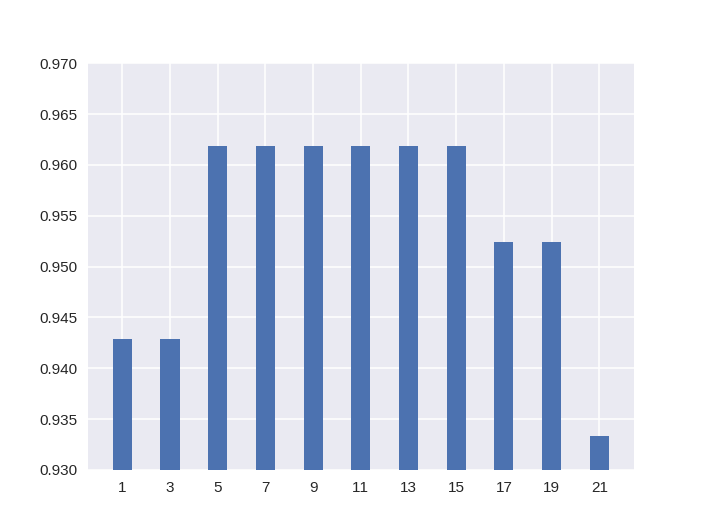

<Container object of 11 artists>

In [14]:
axes = plt.gca()
axes.set_ylim([0.93,0.97])
plt.xticks( x_array)
plt.bar (x_array,y)